In [2]:
import yt
yt.mylog.setLevel(50)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [13]:
cd ../../

/Users/dorislee/Desktop/home


In [14]:
cd ..

/Users/dorislee/Desktop


In [15]:
cd projects/FLASH4.3/object/

/Users/dorislee/Desktop/projects/FLASH4.3/object


In [24]:
# cd ~/project/FLASH4.3/object/

In [16]:
def plot_all(i):
    ds = yt.load("uniform_sphere_hdf5_chk_{}".format(str(i).zfill(4)))
    physical_quantity="density"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_figure_size(5)
    slc.annotate_grids()
    slc.set_cmap("all","rainbow")
    slc.show()

    physical_quantity="pressure"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_cmap("all","rainbow")
    slc.set_figure_size(5)
    slc.set_log("all", False)
    # slc.set_zlim(physical_quantity,58,60)
    slc.show()

    physical_quantity="temperature"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_cmap("all","rainbow")
    slc.set_figure_size(5)
    # slc.set_log("all", False)
    # slc.set_zlim(physical_quantity,58,60)
    slc.show()


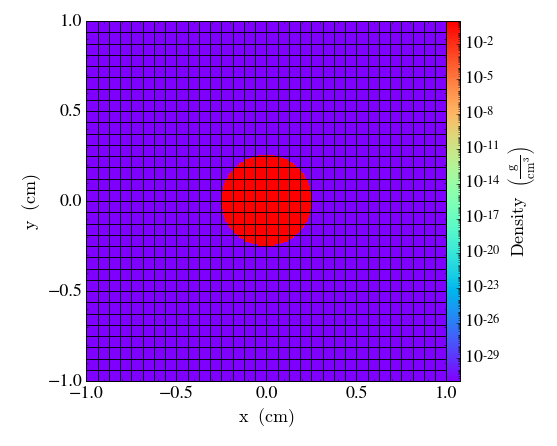


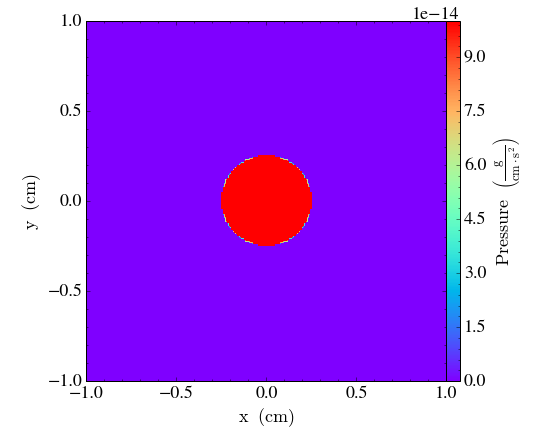


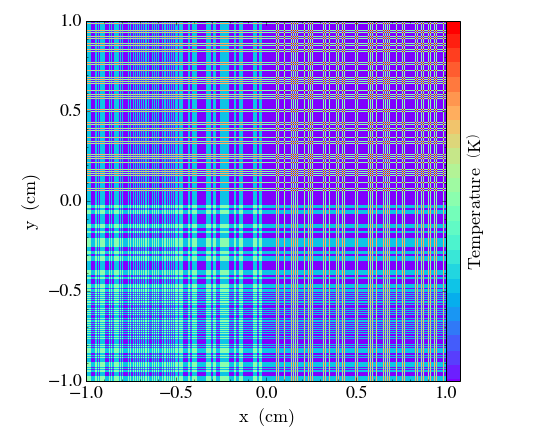

In [11]:
plot_all(0)

In [20]:
def plot_dens(i):
    ds = yt.load("uniform_sphere_hdf5_chk_{}".format(str(i).zfill(4)))
    physical_quantity="density"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_figure_size(5)
    slc.annotate_grids()
    slc.annotate_velocity()
    slc.set_cmap("all","rainbow")
    slc.show()

# vim 268621.out

Then crashes before even progressing one timestep 

# vim 268678.out

In [12]:
ls uniform_sphere_hdf5_plt_cnt_0000

uniform_sphere_hdf5_plt_cnt_0000



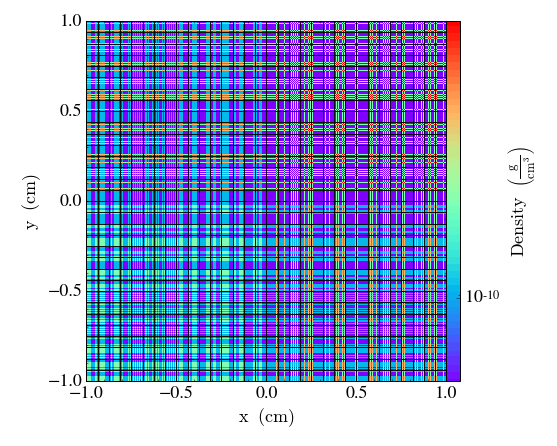


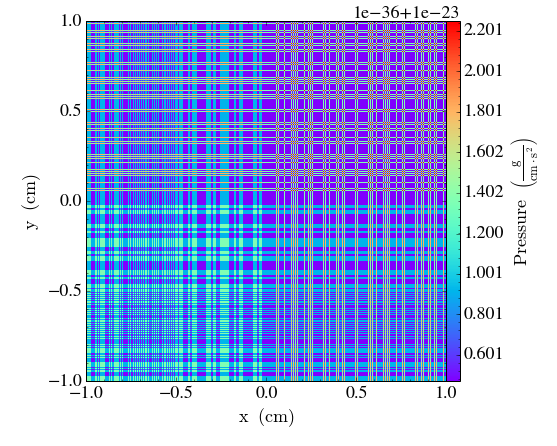


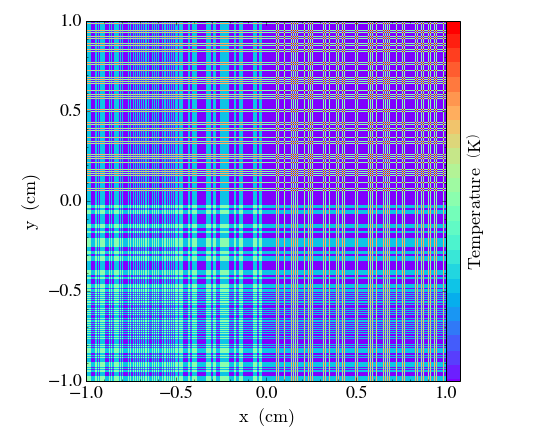

In [21]:
plot_all(1)


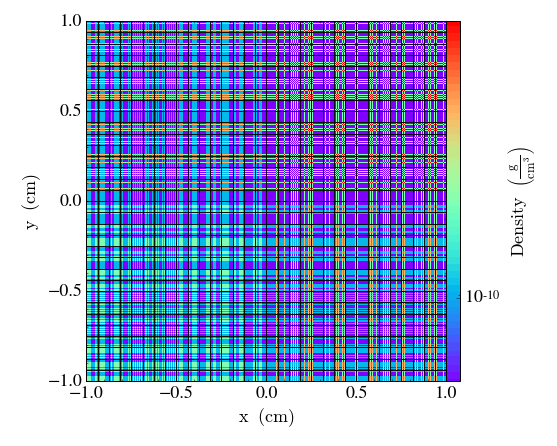


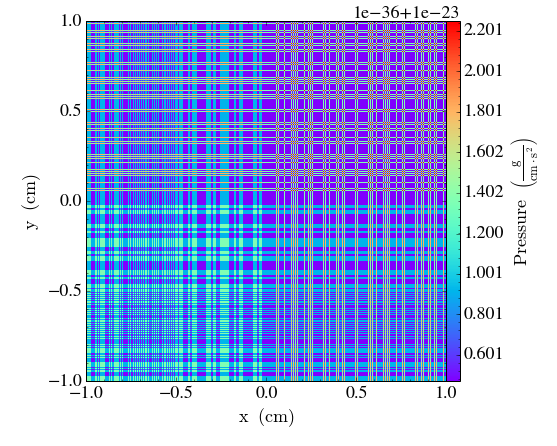


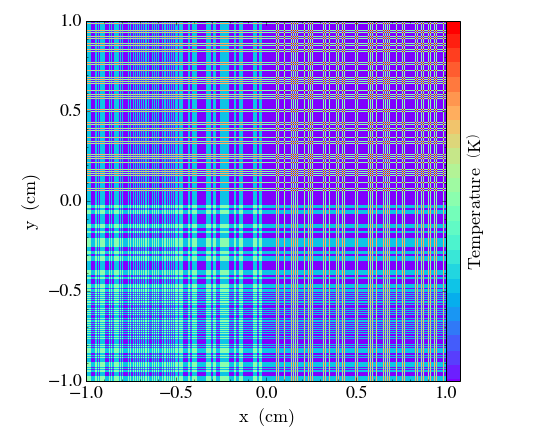

In [22]:
plot_all(5)

# vim 269081.out


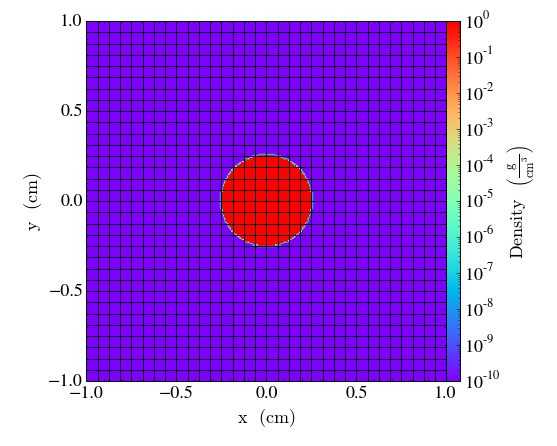


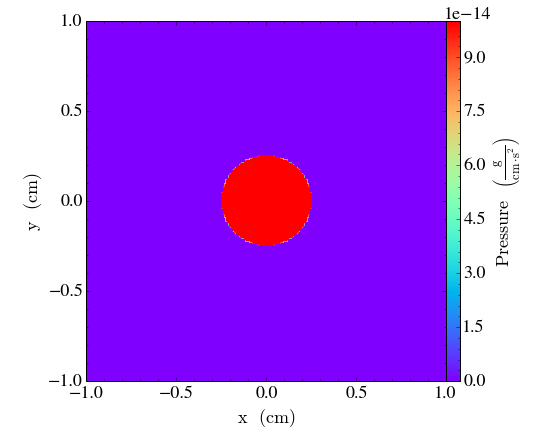


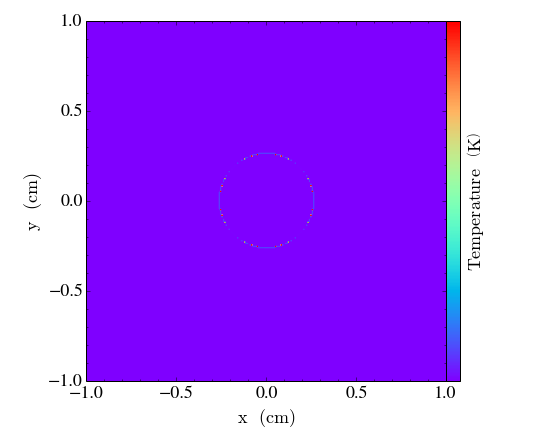

In [17]:
plot_all(1)


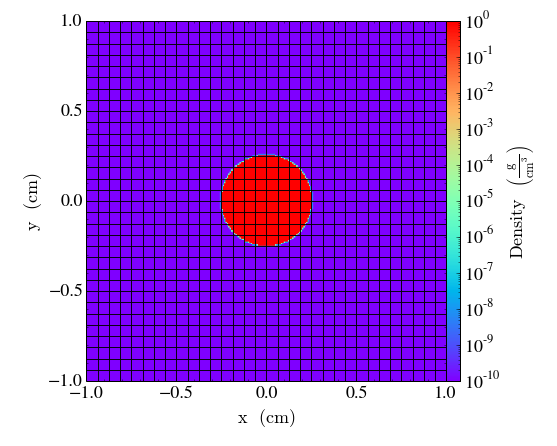


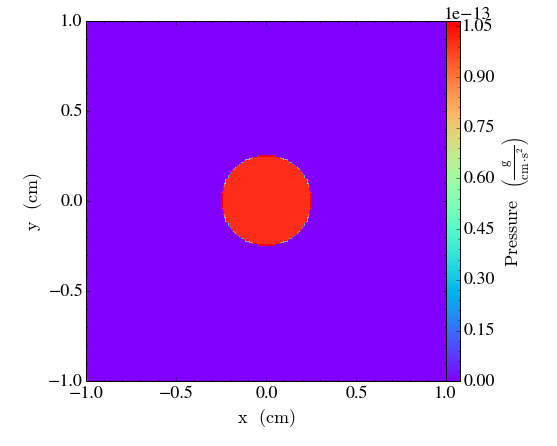


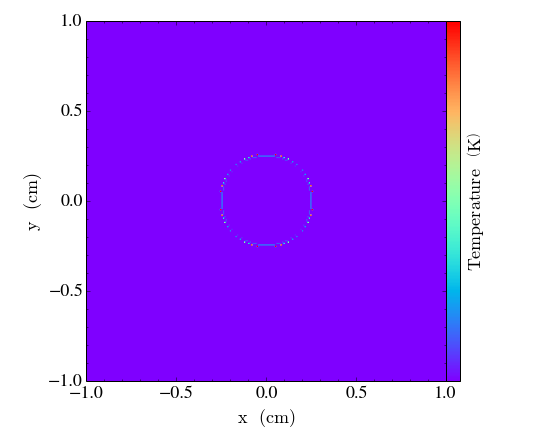

In [23]:
plot_all(2)

/Users/dorislee/.virtualenvs/py27dev/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/dorislee/.virtualenvs/py27dev/lib/python2.7/site-packages/numpy/core/_methods.py:71: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dorislee/.virtualenvs/py27dev/lib/python2.7/site-packages/matplotlib/quiver.py:626: RuntimeWarning: invalid value encountered in less
  short = np.repeat(length < minsh, 8, axis=1)
/Users/dorislee/.virtualenvs/py27dev/lib/python2.7/site-packages/matplotlib/quiver.py:636: RuntimeWarning: invalid value encountered in less
  tooshort = length < self.minlength



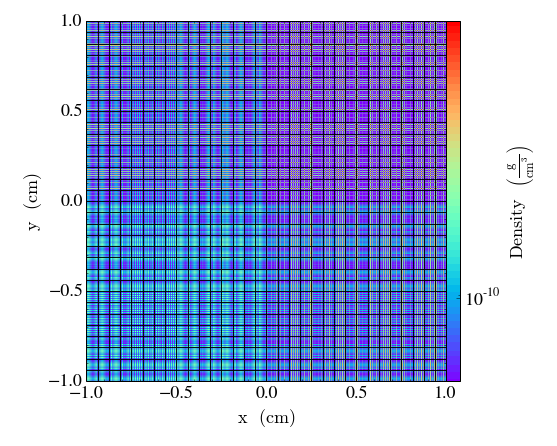

In [21]:
plot_dens(3)

/Users/dorislee/.virtualenvs/py27dev/lib/python2.7/site-packages/matplotlib/colorbar.py:829: RuntimeWarning: divide by zero encountered in divide
  z = np.take(y, i0) + (xn - np.take(b, i0)) * dy / db



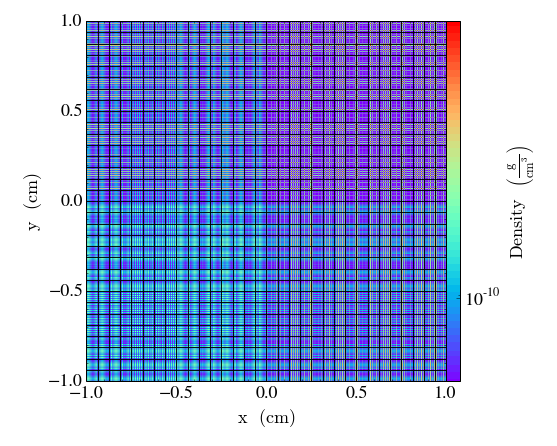


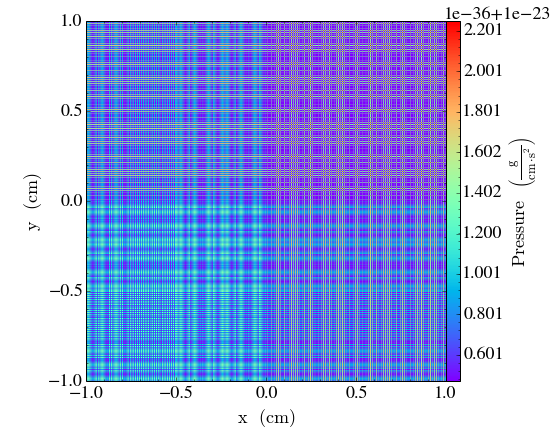


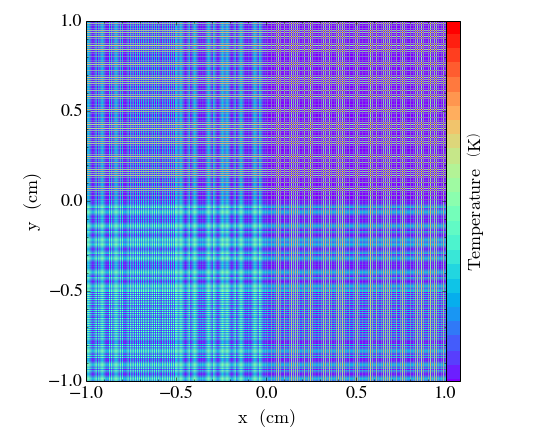

In [18]:
plot_all(5)

# vim 269145.out

No warning messages 

Seems to be taking healthy timesteps (dt_hydro = 1.975E+04)

/Users/dorislee/.virtualenvs/py27dev/lib/python2.7/site-packages/matplotlib/quiver.py:570: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/Users/dorislee/.virtualenvs/py27dev/lib/python2.7/site-packages/matplotlib/quiver.py:570: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))



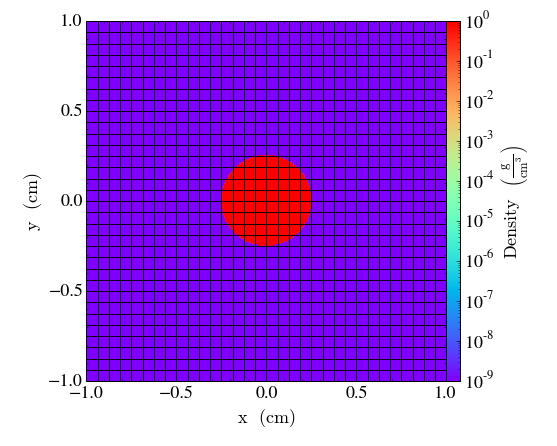

In [26]:
plot_dens(0)

In [ ]:
plot_dens(0)

I tried 3 different cases of the uniform sphere, with outside densities of 1E-31 ,1E-28 ,1E-11, 1E-9 with the inside densities and pressure kept constant (and a reasonable number). These was chosen to correspond to values that were "larger than the smlrho overridden", "larger than smlrho overriddent but not the default smlrho", "larger than the default smlrho". The 1E-11 case is interesting because it seemed to raised the outside density of the floor to 1E-10 in the first two time steps but after the third tstep it just uniforms out. The 1E-9 case seems to evolve for a while too before it reaches the floor. So the test showed that 1) the floor comes in anytime during the simulation when we go below the threshold, not just during initialization and 2) the overridden values for smallr didn't really do much . Also, it looks like the floor resets all variables as uniform, not just the densities.

Oh oops I forgot to actually change the Config and flash.par for this patch. okay smlrho is not set, good!